<a href="https://colab.research.google.com/github/C-HARRIETH/EDA_-Financial-Inclusion/blob/main/Moringa_DS_Core_W2_Independent_Project_2021_03_Chebet_Harrieth_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINANCIAL INCLUSION ANALYSIS**

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Figure out how we can predict which individuals are most likely to have or use a bank account. 

The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### b) Defining the Metric for Success

Getting a high percentage accuracy in the data prediction and getting actionable insights from the analysis.

### c) Understanding the context 

Financial Inclusion has been one of the main obstacles to economic and human development in Africa. Upto 13.9% people in East Africa have access to a bank account. The figure is shocking since, access to bank accounts has been, and still is regarded as an indicator of financial inclusion. Banks still play a crucial role in the provision of financial services such as empowering households to save and easens the process of making payments.

Thus, banks are still crucial contributor to lasting economic growth.

 

### d) Data Relevance

Data provided was highly relevant as it captures the important aspects of factors leading to financial inclusion. 

## 2. Importing Necessary Libraries

In [63]:
# importing pandas library
import pandas as pd

# importing the numpy library
import numpy as np

# importing matplotlib
from matplotlib import pyplot as plt

# importing seaborn
import seaborn as sns
%matplotlib inline

## 2. Reading the Data

In [214]:
# Loading the Data from the source i.e. csv
# ---
Finance= pd.read_csv('Financial_Dataset.csv')


## 3. Checking the Data

In [3]:
# Checking the first five records of the dataset

Finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Checking the tail of the dataset.

Finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [5]:
# Determining the no. of records in our dataset

Finance.shape


(23524, 13)

In [6]:
# Checking whether each column has an appropriate datatype

Finance.dtypes


country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [7]:
# Finding out number of possible missing values

Finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [7]:
# Checking the unique values in each column

Finance.nunique()

COUNTRY                      4
YEAR                         6
UNIQUEID                  8735
HAS_A_BANK_ACCOUNT           2
TYPE_OF_LOCATION             2
CELL_PHONE_ACCESS            2
HOUSEHOLD_SIZE              21
RESPONDENT_AGE              85
GENDER_OF_RESPONDENT         2
THE_RELATHIP_WITH_HEAD       6
MARITAL_STATUS               5
LEVEL_OF_EDUCUATION          7
TYPE_OF_JOB                 10
dtype: int64

## 4. External Data Source Validation

### a.Validation

 The data provided is valid according to several reports done by FinScope which is a body that does national financial surveys. 

 Examples of such surveys done:
 * [Uganda 2018 Survey](http://fsduganda.or.ug/finscope-2018-survey-report/)
 * [Rwanda 2016 Survey](http://www.statistics.gov.rw/publication/finscope-rwanda-2016)
 * [Tanzania 2017 Survey](http://www.fsdt.or.tz/finscope/)

## 5. Tidying the Dataset

In [215]:
# Standardizing the column names

Finance.columns = Finance.columns.str.strip().str.upper().str.replace(' ', '_')

In [216]:
Finance.drop(['THE_RELATHIP_WITH_HEAD', 'LEVEL_OF_EDUCUATION', 'TYPE_OF_JOB', 'MARITAL_STATUS'], axis=1, inplace= True)

In [117]:
Finance.dtypes

COUNTRY                  object
YEAR                      int64
UNIQUEID                 object
HAS_A_BANK_ACCOUNT       object
TYPE_OF_LOCATION         object
CELL_PHONE_ACCESS        object
HOUSEHOLD_SIZE          float64
RESPONDENT_AGE          float64
GENDER_OF_RESPONDENT     object
dtype: object

In [140]:
# Identifying the Missing Data
#

Finance.isnull().values.any()

True

In [141]:
Finance.isnull().sum()

COUNTRY                 14
YEAR                     0
UNIQUEID                 0
HAS_A_BANK_ACCOUNT      36
TYPE_OF_LOCATION        15
CELL_PHONE_ACCESS       11
HOUSEHOLD_SIZE          28
RESPONDENT_AGE          34
GENDER_OF_RESPONDENT    34
dtype: int64

In [142]:
# Checking null values appearing in the column country
series = pd.isnull(Finance["COUNTRY"]) 
Finance[series]

,COUNTRY,YEAR,UNIQUEID,HAS_A_BANK_ACCOUNT,TYPE_OF_LOCATION,CELL_PHONE_ACCESS,HOUSEHOLD_SIZE,RESPONDENT_AGE,GENDER_OF_RESPONDENT
18200,NaN,2017,uniqueid_3398,No,Urban,Yes,1.0,25.0,Female
18201,NaN,2017,uniqueid_3399,No,Urban,No,1.0,60.0,Female
18202,NaN,2017,uniqueid_3400,No,Urban,Yes,1.0,19.0,Female
18203,NaN,2017,uniqueid_3401,No,Urban,No,1.0,62.0,Female
18204,NaN,2017,uniqueid_3402,No,Urban,No,2.0,42.0,Female
18205,NaN,2017,uniqueid_3403,No,Rural,No,3.0,18.0,Male
18206,NaN,2017,uniqueid_3404,No,Urban,Yes,2.0,73.0,Female
18207,NaN,2017,uniqueid_3405,No,Urban,No,1.0,40.0,Male
18208,NaN,2017,uniqueid_3406,No,Urban,No,3.0,28.0,Male
18312,NaN,2017,uniqueid_3510,No,Urban,No,2.0,19.0,Male


In [143]:
# Sampling the unique ids having null values. How many times do they appear 
# in the data set?

one= Finance['UNIQUEID'] == 'uniqueid_3402'
two= Finance['UNIQUEID'] == 'uniqueid_3513'
three = Finance['UNIQUEID'] == 'uniqueid_3398'

Finance[three]


,COUNTRY,YEAR,UNIQUEID,HAS_A_BANK_ACCOUNT,TYPE_OF_LOCATION,CELL_PHONE_ACCESS,HOUSEHOLD_SIZE,RESPONDENT_AGE,GENDER_OF_RESPONDENT
3397,Kenya,2018,uniqueid_3398,No,Rural,Yes,4.0,54.0,Female
9465,Rwanda,2016,uniqueid_3398,No,Rural,Yes,5.0,43.0,Female
18200,NaN,2017,uniqueid_3398,No,Urban,Yes,1.0,25.0,Female


Observation: The unique ids tested appear three times in a dataset each representing a different country. 

In [217]:
# Dealing with the Missing Data
#

# Dropping null values in Country column.
# Number of null values in Country column account for 0.06% of the dataset
# Dropping won't affect the data

Finance['COUNTRY'].dropna(inplace= True)



In [145]:
Finance.isnull().sum().sum()

172

In [218]:
# Value of null values is also small hence the dropping

Finance.dropna(inplace= True)

In [219]:
# Dealing with null values

Q1 = Finance.quantile(0.25)
Q3 = Finance.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
finance = Finance[~((Finance < (Q1 - 1.5 * IQR)) | (Finance > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(finance.shape)

# Printing the shape of our old dataset
# ---
#
print(Finance.shape)

(22769, 9)
(23388, 9)


In [25]:
# More data cleaning procedures
#

# Getting duplicates
Finance.duplicated().values.any()

False

## 6. Exploratory Analysis

### Univariate Analysis

In [12]:
# Description of the data

Finance.describe()

,YEAR,HOUSEHOLD_SIZE,RESPONDENT_AGE
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


From the description we can conclude that the columns year, Household size and Respodent age have outliers most of them being between Q3 and the maximum value

In [13]:
Finance.describe(include='all')

,COUNTRY,YEAR,UNIQUEID,HAS_A_BANK_ACCOUNT,TYPE_OF_LOCATION,CELL_PHONE_ACCESS,HOUSEHOLD_SIZE,RESPONDENT_AGE,GENDER_OF_RESPONDENT,THE_RELATHIP_WITH_HEAD,MARITAL_STATUS,LEVEL_OF_EDUCUATION,TYPE_OF_JOB
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_971,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [26]:
Finance.columns

Index(['COUNTRY', 'YEAR', 'UNIQUEID', 'HAS_A_BANK_ACCOUNT', 'TYPE_OF_LOCATION',
       'CELL_PHONE_ACCESS', 'HOUSEHOLD_SIZE', 'RESPONDENT_AGE',
       'GENDER_OF_RESPONDENT', 'THE_RELATHIP_WITH_HEAD', 'MARITAL_STATUS',
       'LEVEL_OF_EDUCUATION', 'TYPE_OF_JOB'],
      dtype='object')

In [85]:
Finance['RESPONDENT_AGE'].mode()

0    30.0
dtype: float64

Most people are 30 years old.

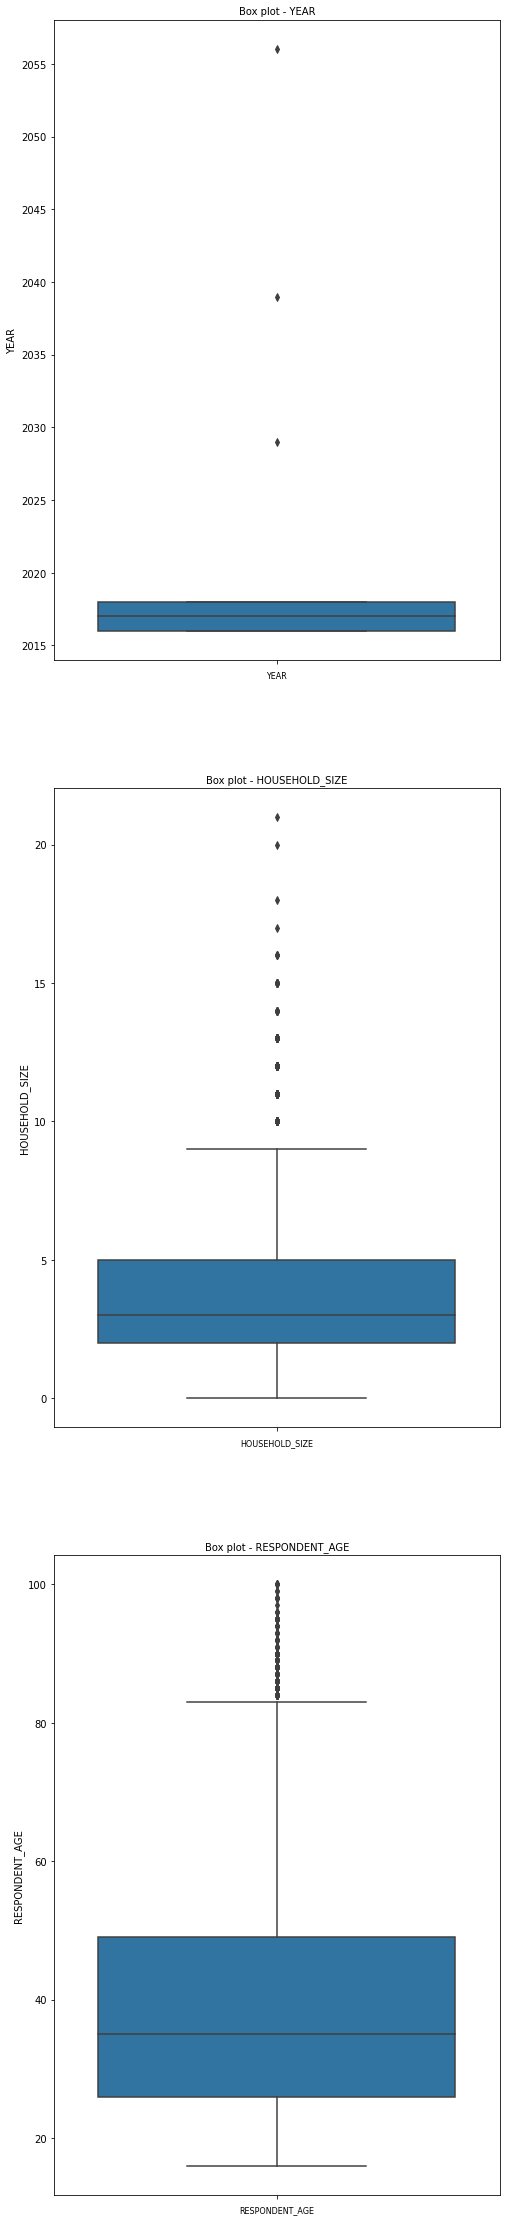

In [36]:
# Box plots to see the outliers

col_names = ['YEAR','HOUSEHOLD_SIZE', 'RESPONDENT_AGE']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
        
    sns.boxplot(y=Finance[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

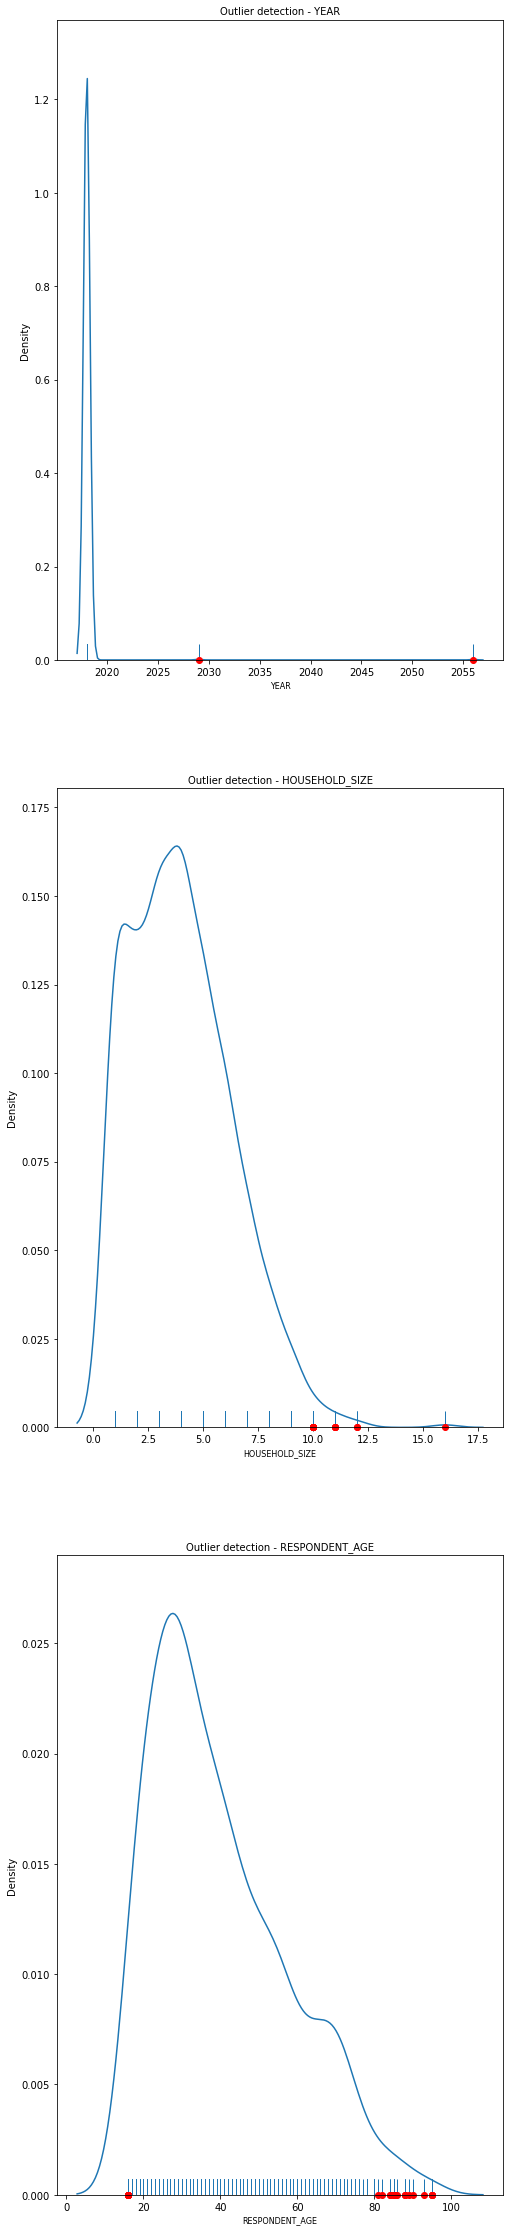

In [39]:
# Percentile based outlier removal 
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['YEAR','HOUSEHOLD_SIZE', 'RESPONDENT_AGE']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = Finance[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

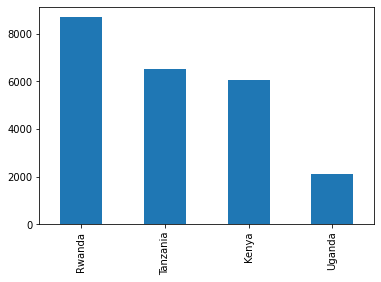

In [47]:
# Frequency Distribution by Country

Finance['COUNTRY'].value_counts().plot.bar()

Data from Rwanda is more than that of Tanzania and Kenya. Uganda has the least amount of data.

In [76]:
# Defining conditions

cellaccess= Finance['CELL_PHONE_ACCESS'] == 'Yes'
hasbankacc= Finance['HAS_A_BANK_ACCOUNT'] == 'Yes'

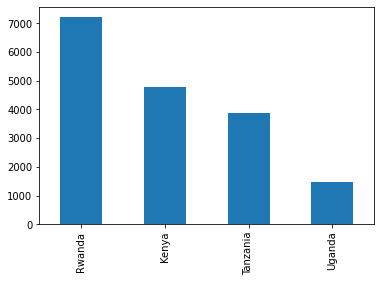

In [51]:
# Frequency Distribution by Country
# Those having cell access

Finance[cellaccess]['COUNTRY'].value_counts().plot.bar()

Rwanda has the most residents having cell phone access. This could either be due to the fact that data from Rwanda is more or they could be having better network connections. Uganda still tails. More Kenyans have cell access as compared to the Tanzanians.

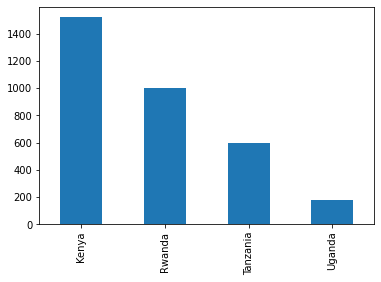

In [52]:
# Frequency Distribution by Country
# Those having bank accounts

Finance[hasbankacc]['COUNTRY'].value_counts().plot.bar()

As compared to cellphone access, more people from Kenya have bank accounts as compared to those in other countries. There is also a big difference between each country in terms of having bank accounts.

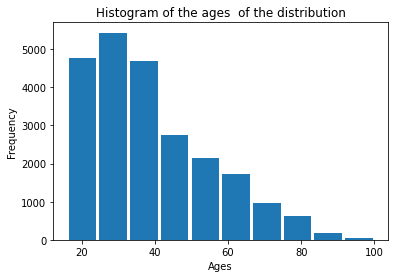

In [42]:
# Finding the frequency distribution of the ages in the dataset

age = Finance['RESPONDENT_AGE']
plt.hist(age, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Histogram of the ages  of the distribution') 
plt.show()

Most of the people are middle-aged. Between 16 and 49.

Text(0.5, 1.0, 'Pie Chart of Overall Population Distribution')

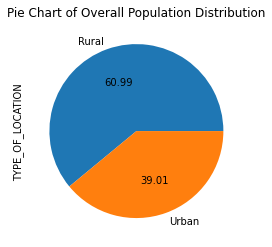

In [79]:
# Number of people having access to bank accounts

Finance['TYPE_OF_LOCATION'].value_counts().plot(kind='pie', autopct='%.2f')

plt.title('Pie Chart of Overall Population Distribution')


61% of the population lives in the rural areas.

In [54]:
ke= Finance['COUNTRY'] == 'Kenya'
rwan = Finance['COUNTRY'] == 'Rwanda'
tz = Finance['COUNTRY'] == 'Tanzania'
ug = Finance['COUNTRY'] == 'Uganda'

Text(0.5, 1.0, 'Pie Chart of Overall Bank/Acc Distribution')

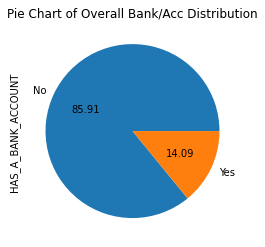

In [73]:
# Number of people having access to bank accounts

Finance['HAS_A_BANK_ACCOUNT'].value_counts().plot(kind='pie', autopct='%.2f')

plt.title('Pie Chart of Overall Bank/Acc Distribution')


Text(0.5, 1.0, 'Pie Chart of Kenyans Bank/Acc Distribution')

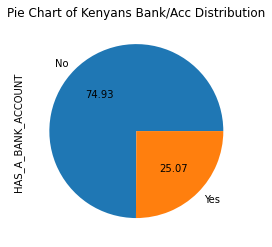

In [59]:
# Proportion of people having bank accounts in Kenya.
Finance[ke]['HAS_A_BANK_ACCOUNT'].value_counts().plot(kind='pie', autopct='%.2f')

plt.title('Pie Chart of Kenyans Bank/Acc Distribution')

Even though Kenya had most people having bank accounts in comparison to the three countries, most of them did not have bank accounts within the country.

Text(0.5, 1.0, 'Pie Chart of Tanzanians Bank/Acc Distribution')

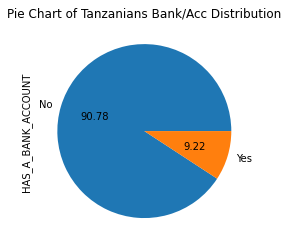

In [60]:
# Proportion of people having bank accounts in Tanzania.
Finance[tz]['HAS_A_BANK_ACCOUNT'].value_counts().plot(kind='pie', autopct='%.2f')

plt.title('Pie Chart of Tanzanians Bank/Acc Distribution')

Text(0.5, 1.0, 'Pie Chart of Ugandans Bank/Acc Distribution')

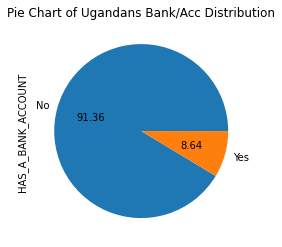

In [61]:
# Proportion of people having bank accounts in Uganda.

Finance[ug]['HAS_A_BANK_ACCOUNT'].value_counts().plot(kind='pie', autopct='%.2f')

plt.title('Pie Chart of Ugandans Bank/Acc Distribution')

Text(0.5, 1.0, 'Pie Chart of Rwandans Bank/Acc Distribution')

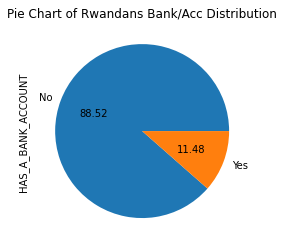

In [62]:
# Proportion of people having bank accounts in Rwanda.

Finance[rwan]['HAS_A_BANK_ACCOUNT'].value_counts().plot(kind='pie', autopct='%.2f')

plt.title('Pie Chart of Rwandans Bank/Acc Distribution')

**Conclusions from the Univariate Analysis**

Rwanda and Kenya are the top countries having cell phone access as well as having people with bank accounts. Despite Kenya leading in terms of having the most number of people with bank accounts, it only accounts for a fourth of the population. 

Uganda tails both in having cell phone access as well as the number of people having bank accounts. This could be due to Uganda having the least amount of data. 

Generally 14% of East Africans have bank accounts.

### Bivariate Analysis

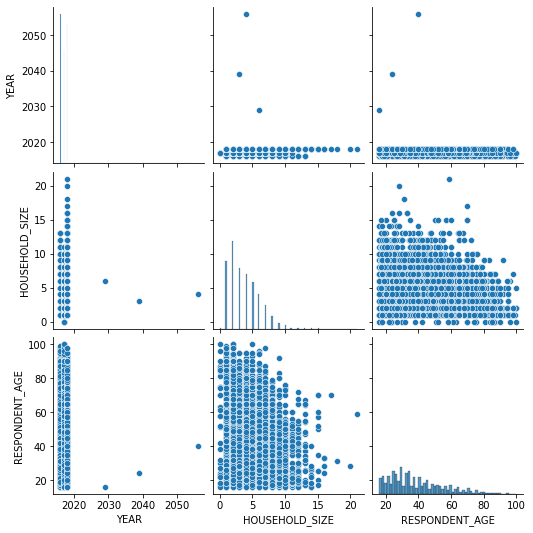

In [82]:
# Bivariate summaries 

sns.pairplot(Finance)
plt.show()

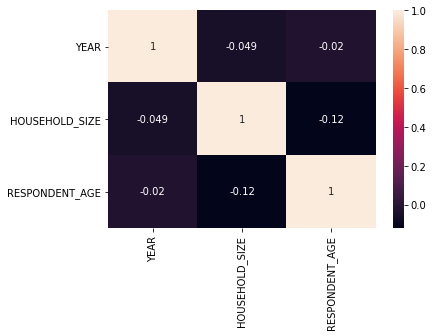

In [84]:
sns.heatmap(Finance.corr(),annot=True)
plt.show()

There seems to be a weak correlation between variables in the dataset.

In [88]:
Finance.columns

Index(['COUNTRY', 'YEAR', 'UNIQUEID', 'HAS_A_BANK_ACCOUNT', 'TYPE_OF_LOCATION',
       'CELL_PHONE_ACCESS', 'HOUSEHOLD_SIZE', 'RESPONDENT_AGE',
       'GENDER_OF_RESPONDENT', 'THE_RELATHIP_WITH_HEAD', 'MARITAL_STATUS',
       'LEVEL_OF_EDUCUATION', 'TYPE_OF_JOB'],
      dtype='object')

In [196]:
# Constructing a chi square

from scipy.stats import chi2_contingency

contigency = pd.crosstab(finance['HAS_A_BANK_ACCOUNT'], finance['TYPE_OF_LOCATION'], )
contigency

TYPE_OF_LOCATION,Rural,Urban
HAS_A_BANK_ACCOUNT,,
No,12218,7313
Yes,1616,1622


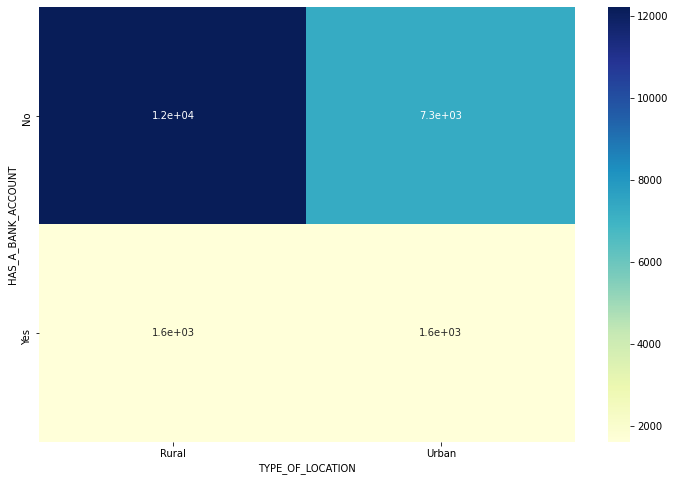

In [198]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [197]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) # Print the p-value
print(p)

2.528394335470285e-42


In [200]:
contigency_p = pd.crosstab(finance['CELL_PHONE_ACCESS'], finance['HAS_A_BANK_ACCOUNT'])
contigency_p

HAS_A_BANK_ACCOUNT,No,Yes
CELL_PHONE_ACCESS,,
No,5655,93
Yes,13876,3145


In [201]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency_p) # Print the p-value
print(p)

1.9697687062235946e-219


The p-values gotten are out of range. 

### Multivariate Analysis

In [112]:
pip install factor_analyzer==0.2.3

In [171]:
# Bartlett's test

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(Finance)
chi_square_value, p_value

(410.5827501332822, 2.0012072980862913e-65)

Indicates that a factor analysis is not suitable for this dataset.

In [118]:
Finance.columns

Index(['COUNTRY', 'YEAR', 'UNIQUEID', 'HAS_A_BANK_ACCOUNT', 'TYPE_OF_LOCATION',
       'CELL_PHONE_ACCESS', 'HOUSEHOLD_SIZE', 'RESPONDENT_AGE',
       'GENDER_OF_RESPONDENT'],
      dtype='object')

In [220]:
# Preprocessing

X = finance[['YEAR', 'RESPONDENT_AGE']]
y = finance[['UNIQUEID', 'HAS_A_BANK_ACCOUNT']]

In [221]:
# Separation

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [222]:
# Normalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [223]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [224]:
# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_

In [225]:
# Using one PC

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [226]:
# Training and making Predictions
# Using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

## 7. Follow up questions

### a). Did we have the right data?

The data was inclusive. Appropriate for the analyses though one country suffered in terms of having a little data.

### b). Do we need other data to answer our question?

The data provided was sufficient. Uganda would need more data to get at better solutions for them.